# <font color='black'>Introduction aux systèmes radar</font>

---



## <font color='black'>Introduction</font>

---

Un RADAR (RAdio Detection And Ranging) est un système de détection électromagnétique (EM) et de mesure de distance. Son principe est analogue aux systèmes d'écholocation qu'utilisent certains animaux évoluant en milieu obscurs (chauve-souris, cétacés). La différence principale est que l'on utilise une onde EM et non sonore.

Le radar émet donc une impulsion EM de forte puissance. Celle-ci se propage jusqu'à rencontrer un éventuel obstacle. Il réfléchit l'onde dont une partie est recueillie sur l'antenne du radar. La mesure du temps de vol entre l'onde émise et l'onde reçue permet d'estimer la distance de la cible.

<img src="images/rad_fig1.png" width="500">


Ce système est donc actif, ce qui lui procure des avantages par rapport aux systèmes de détection et de mesures passifs (optiques, par exemple) nécessitant une source extérieure au système (soleil, par exemple). De plus, en fonction de la bande du spectre EM choisie pour émettre, le système sera capable de «voir» à travers certains milieux opaques à la lumière visible (nuages, brouillard) et même pénétrer la matière sur une certaine profondeur (détection de mines enfouies, ...). Enfin, comme on maitrise l’onde émise, on a directement accès à des mesures précises de distances, contrairement aux systèmes passifs.


Le champ d’application de tels systèmes est donc très vaste. Historiquement, les applications sont militaires (veille contre les attaques aériennes, détections de navires, autodirecteurs de missiles, cartographie de terrains, ...). Dans le monde civil, on peut citer la navigation aérienne et maritime, la météorologie, l’altimétrie, les systèmes de freinage d’urgence pour véhicules automobiles, ...).

## Emission d’une impulsion unique, cible fixe

Nous allons tout d’abord nous placer dans le cas le plus simple d’objets à détecter immobiles.

### Modélisation des signaux émis et reçus


Dans un premier temps, le signal émis, $e(t)$, sera une simple impulsion de durée $T = 1$ ms, modulée par une fréquence porteuse constante $f_0 = 40$ KHz, comme représenté sur la figure ci-dessous:

<img src="images/rad_fig2.png" width="500">


Le signal reçu sur l’un des récepteurs, $r(t)$, sera une réplique de $e(t)$ atténuée et décalée dans le temps d’une valeur $\tau_0$.

#### Question 1

Donner l’expression de $\tau_0$ en fonction de la distance $d$ entre la cible et le radar et $c$ la célérité des ondes.

---


 $\tau_0 = 2\frac{d}{c}$

Les signaux réels, émis et reçus sont tout d’abord convertis en leurs signaux analytiques correspondants.

>##### Signal analytique, transformée de Hilbert 
>La transformée de Fourier $X(f)$ d’un signal réel $x(t)$ est à symétrie hermitienne (module pair et phase impaire). L'observation de la transformée de Fourier seulement sur les fréquences positives suffit donc à reconstruire le signal sans perte d'information. 
>
>On peut ainsi définir le signal analytique associé par 
>
> $$X_a(f) = 2 U(f) X(f)$$
>
>où $U(f)$ est l’échelon unité. Celui-ci est un signal complexe $x_a(t) = x(t) + i \hat x(t)$ dont la partie réelle est le signal d’origine $x(t)$. Dans le cas des signaux à bande étroite (dont l’excursion fréquentielle est faible autour d’une fréquence centrale), la partie imaginaire, appelée Transformée de Hilbert correspond à la composante en quadrature par rapport à $x(t)$ (déphasée de $\pi/2$)



#### Question 2

Vérifier que $\Re[x_a(t)] = x(t)$ en calculant $\mathcal F [\Re[x_a(t)]]$.
De même, donner la fonction de transfert fréquentielle correspondant à la transformée de Hilbert en calculant $\mathcal F [\Im[x_a(t)]]$ . En déduire que la transformée de Hilbert correspond à un filtre déphaseur pur de $\cfrac{\pi}{2}$.
Calculer la transformée de Fourier du signal émis, $e(t)$. En déduire l’expression du signal analytique associé, $e_a(t)$.

---

$$\begin{aligned}
    \mathcal{F}( \Re (x_a)) (f) &= \mathcal{F} (\frac{1}{2} (x_a + \overline{xa})) (f)\
    &= \frac{1}{2} \left[ \mathcal{F}{xa} (f) + \mathcal{F}{\overline{x_a}} (f)\right]\
    &= \frac{1}{2} \left[ Xa(f) + \overline{\mathcal{F}{x_a}(-f)} \right]\
    &= \frac{1}{2} \left[ X_a(f) + \overline{X_a}(-f)\right]
\end{aligned}$$

$$\begin{aligned}
    X_a(-f) &= 2 , U(-f) , X(-f)\
    &= 2 , U(-f) \overline{X}(f)\
    &= \overline{2 , U(-f) , X(f)}
\end{aligned}$$

$$\begin{aligned}
    \mathcal{F}( \Re (x_a)) (f) &= X(f) (U(f) + U(-f))\
    &= X(f)\
    &= \mathcal{F}_x (f)
\end{aligned}$$

D'où (par injectivité de la transformée de Fourier):
$$\boxed{\Re(x_a) = x}$$


Comme 
$\mathcal F [\Im[x_a(t)]] = -isign(f)X(f)$ on en déduit que la fonction de transfert fréquentielle est la multiplication par $-i-isign(f)$ ce qui correspond bien à un déphasage de plus ou moins $ \frac \pi 2$.





L’intérêt de convertir les signaux réels en leurs équivalents complexes réside dans le fait que tout déphasage sera vu comme une simple multiplication par un nombre complexe. Il est ainsi plus facile d’extraire et de traiter la phase de 
$x_a(t) = \alpha e^{i \varphi} e^{2 i \pi f_0 t}$ que de $x(t) = \alpha \cos (2 i \pi f_0 t + \varphi)$

### Numérisation des signaux

Ces signaux complexes sont ensuite échantillonnés à une fréquence $f_s = 9.5$ KHz (environ), ne respectant pas le théorème de Shannon. Cela permet de démoduler (diminution de la fréquence porteuse) les signaux et de réduire la taille des vecteurs à traiter. 

> #####  Théorème de Shannon – Repliement de spectre (aliasing)
>
>Le fait d’échantillonner un signal continu à une cadence $f_s$ entraine une périodisation de sa transformée de Fourier à la période $f_s$ Ainsi, si l’on veut retrouver, sans ambiguïté le signal continu d’origine, il faut échantillonner à une cadence strictement supérieure à 2 fois la fréquence maximale contenue dans le signal d’origine.
>
>Si cette condition de Shannon n’est pas respectée, une partie de l’information sera perdue et le signal sera modifié. Dans le cas d’un signal à bande étroite, si l’on choisit une fréquence d’échantillonnage supérieure à la bande mais inférieure à la fréquence porteuse, le repliement de spectre engendré modifie seulement la fréquence porteuse apparente et est assimilable à une démodulation.

#### Question 3
Quelle sera la fréquence apparente des signaux échantillonnés ?

---

La fréquence apparente sera de 2 kHz.

### Estimation de la distance


Nous avons vu dans la partie précédente, que le but premier d’un radar était de détecter et d’estimer la distance des objets environnants. Pour cela, la méthode optimale est d’effectuer l’intercorrélation entre le signal reçu et le signal émis.

> ##### Autocorrélation - Intercorrélation
>
> On sait que l’énergie se conserve par transformée de Fourier (théorème de Parseval) :
>
> $$ \int_{-\infty}^{+\infty} |x(t)|^2 dt = \int_{-\infty}^{+\infty} |X(f)|^2 df $$
>
> On peut ainsi définir une densité spectrale d’énergie :  $\Phi_x (f) = |X(f)|^2$.
>
>
> Par transformée de Fourier inverse, on a :
> $$ \mathcal F^{-1} [|X(f)|^2] = x(t) * x^*(-t) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
>C’est la fonction d’autocorrélation, notée :
> $$ R_x(\tau) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
> Elle mesure la ressemblance d’un signal $x(t)$ avec sa réplique décalée en temps. Cette fonction est à symétrie hermitienne et maximale en 0. 
>
> On peut généraliser cette fonction à l’intercorrélation entre 2 signaux :
> $$ R_{xy}(\tau) = \int_{-\infty}^{+\infty}  x(t)\, y^*(t-\tau) dt = x(t) * y^*(-t) = \mathcal F^{-1} [X(f)Y^*(f)] $$
>
>Pour les signaux discrétisés en temps, on utilise la formulation suivante :
> $$ R_{xy}[k] = \sum_{n = -\infty}^{+\infty} x[n] y^*[n-k] $$

> ##### Algorithme de FFT
> L’algorithme dit de Fast Fourier Transform (FFT) dû à Cooley et Tukey (1965) consiste à scinder la transformée de Fourier du vecteur initial de taille N en transformées de Fourier de taille N/2. On peut ainsi se ramener successivement à des transformées de Fourier élémentaires de taille 2 permettant de passer d’une charge calculatoire en $O(N^2)$ avec l’algorithme « naïf » (produit matriciel) à une charge calculatoire en $O(Nlog_2(N))$.

#### Question 4
En supposant que $r_a(t) = \alpha e_a(t - \tau_0)$ où $\alpha$ est un nombre complexe inconnu, exprimer l’intercorrélation $R_{r_a e_a}(\tau)$ en fonction de l’autocorrélation de $e_a(t)$. Calculer et tracer la fonction d’autocorrélation de $e_a(t)$ .

---

$ R_{r_a e_a}(\tau) = \alpha R_{e_a} (\tau - \tau_0) $

$R_{e_a} (\tau) = \int_{-\infty}^{+\infty}  e_a(t)\, e_a^*(t-\tau) dt = \int_{-\infty}^{+\infty} \Pi_{[-\frac T 2, \frac T 2]}(t) e^{iw_0t}\, \Pi_{[-\frac T 2, \frac T 2]}(t - \tau) e^{-iw_0(t-\tau)}\,dt = e^{iw_0\tau} \int_{\tau - \frac T 2}^{\frac T 2}  e^{iw_0t}\, e^{-iw_0t}dt =e^{iw_0\tau} (T-\tau) $


` Code 1 - Une impulsion non modulèe en fréquence 
Le fichier « signal1.mat » correspond à un enregistrement des signaux analytiques émis et reçus sur une scène réelle.
. Observer l’allure temporelle de ces signaux et vérifier la valeur de la fréquence observée.
. Calculer et tracer la fonction d’intercorrélation.
. Essayer d’identifier le nombre de cibles présentes ainsi que leur distance. Essayer de définir une résolution du système (distance minimale à partir de laquelle on peut voir 2 cibles). Relier cette résolution à la durée de l’impulsion émise T.
`

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

c = 340    # célérité des ondes sonores 
f0 = 40E3  # fréquence porteuse
T = 1E-3   # durée de l'impulsion

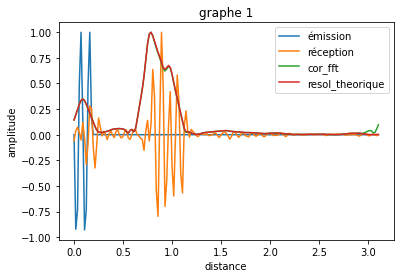

In [2]:
data = scipy.io.loadmat('data/signal1.mat') # chargement du fichier de données

e = data['e'].T[0]
r = data['r'].T[0]
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2          # axe distance (metres)

cor_fft = np.fft.ifft(np.fft.fft(r)*np.conjugate(np.fft.fft(e)))    # calcul de la corrélation par FFT
#resol_theorique = np.correlate(r,e, mode= 'same')           # résolution théorique
resol_theorique = np.empty(N, dtype = complex)
for k in range(N):
    resol_theorique[k] = sum(r[k:]*np.conjugate(e[:N-k]))


#tracés
plt.figure()
plt.plot(d[0],np.real(e)/np.max(np.real(e)), label = "émission")
plt.plot(d[0],np.real(r)/np.max(np.real(r)), label = "réception")
plt.plot(d[0],np.abs(cor_fft)/np.max(np.abs(cor_fft)), label = "cor_fft")
plt.plot(d[0],np.abs(resol_theorique)/np.max(np.abs(resol_theorique)), label = "resol_theorique")
plt.legend()
plt.xlabel("distance")
plt.ylabel("amplitude")
plt.title("graphe 1")
plt.show()

On ne reconnaît qu'une seule cible, la résolutiondu système (espacement à partir duquel les réponses se superposent et ne peuvent donc plus être visible comme 2 triangles distincts) vaut cT, soit 34cm.

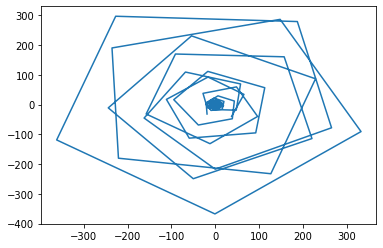

In [3]:
plt.plot(np.real(cor_fft), np.imag(cor_fft))                      

Le pouvoir de résolution du système en utilisant cette forme d’onde basique (impulsion modulée par une fréquence constante) ne permet pas de distinguer 2 objets proches. L’amélioration de la résolution du système passe par la réduction du temps d’impulsion. Malheureusement, cette diminution va à l’encontre de la portée du système qui est proportionnelle à l’énergie émise. La solution classiquement employée pour diminuer la résolution sans sacrifier la portée est d’augmenter la bande du signal émis. Nous allons donc maintenant utiliser une onde modulée linéairement en fréquence, comme représentée sur la figure suivante. La fréquence varie de 38 à 42 KHz (soit une bande $𝐵 = 4$ KHz autours de $f_0$).

<img src="images/rad_fig3.png" width="500">

#### Question 5

Quelles vont être les fréquences observées après échantillonnage à $f_s = 9.5$ KHz ? Si l’on suppose que la transformée de Fourier de $e_a(t)$ est proportionnelle à un rectangle de largeur $𝐵$ centré sur $f_0$ ( $\Pi_B \left(f - f_0)\right)$ ), calculer la largeur de la fonction d’autocorrélation du signal émis. En déduire la résolution théorique du système.

---

 Les fréquences observées s'étendront de 0 à 4 kHz.
 La fonction d'autocorrélation est donc proportionnelle à un sinus cardinal de fréquence $ \frac B 2$. La largeur de cette fonction est donc $ \frac 2 B$ ce qui donne un résolution théorique de 8.5 cm.

` Code 2 - Une impulsion modulée en fréquence
Le fichier « signal2.mat » correspond à un enregistrement de ces signaux modulés en fréquence sur la même scène que précédemment.
. Calculer et tracer la fonction d’intercorrélation.
. Essayer d’identifier le nombre de cibles ainsi que leur distance. Comparer à la résolution théorique calculée au-dessus.
`

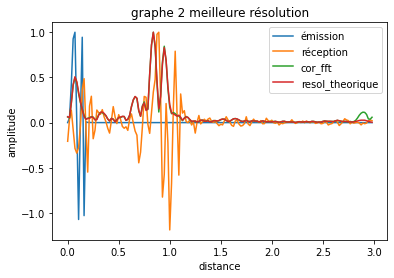

(array([  4,  18,  37,  47,  58,  74,  92, 107, 118, 135, 148, 162],
      dtype=int64), {'peak_heights': array([ 89.24060776,  20.14838649,  51.20847342, 178.39263253,
        19.98264254,   4.84189846,   7.98371444,   3.47879091,
         2.49198422,   2.38013965,   4.33604024,  20.63788595])})


In [4]:
from scipy.signal import find_peaks
B = 4E3 #bande de fréquence

data = scipy.io.loadmat('data/signal2.mat')
e = data['e'].T[0]
r = data['r'].T[0]
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2
resolution = (c*2/B)/(c/Fs/2)

cor_fft = np.fft.ifft(np.fft.fft(r)*np.conjugate(np.fft.fft(e)))    # calcul de la corrélation par FFT
peaks = find_peaks(np.abs(cor_fft), distance=resolution, height= 0.5) 

resol_theorique = np.empty(N, dtype = complex)
for k in range(N):
    resol_theorique[k] = sum(r[k:]*np.conjugate(e[:N-k]))


#tracés
plt.figure()
plt.plot(d[0],np.real(e)/np.max(np.real(e)), label = "émission")
plt.plot(d[0],np.real(r)/np.max(np.real(r)), label = "réception")
plt.plot(d[0],np.abs(cor_fft)/np.max(np.abs(cor_fft)), label = "cor_fft")
plt.plot(d[0],np.abs(resol_theorique)/np.max(np.abs(resol_theorique)), label = "resol_theorique")
#plt.plot(d[0][peaks[0]],np.abs(cor_fft)/np.max(np.abs(cor_fft))[peaks[0]])
plt.legend()
plt.xlabel("distance")
plt.ylabel("amplitude")
plt.title("graphe 2 meilleure résolution")
plt.show()
print(peaks)

On arrive cette fois a distinguer les deux cibles, la résolution du sytème est bel et bien meilleure.

## Emission d’un train d’impulsions, cible mobile

### Modélisation des signaux émis et reçus

Nous allons maintenant considérer que les cibles visées peuvent être mobiles. Nous supposerons le vecteur vitesse constant durant le temps de mesure (quelques dixièmes de secondes).

#### Question 6

Montrer que le retard de propagation peut maintenant s’exprimer comme suit $\tau (t) \approx \cfrac{2 d_0}{c} + \cfrac{2 V_r}{c} t $ en fonction de la position initiale $d_0$ de la cible et de sa vitesse radiale $V_r$. Si l’on note $e_a(t) = \beta(t) e^{2 i \pi f_0 t }$, donner l’expression du signal reçu. Montrer que celui-ci peut se
mettre sous la forme suivante : $r_a(t) = \alpha e_a(t - \tau_0) e^{- 2 i \pi f_d t}$ si l’on néglige l’effet de la vitesse sur le terme $\beta(t)$. Donner l’expression de la fréquence Doppler : $f_d$.

---

En négligeant le déplacement de la cible durant le déplacement de l'onde on retrouve bien le résultat formulé. 
On a de plus $ f_d = 2 \frac {V_r f_0} c $.

### Estimation de la distance et de la vitesse

Le signal émis est maintenant un train de 8 impulsions successives espacées de 𝑇𝑟, comme représenté sur la figure suivante.
<img src="images/rad_fig4.png" width="500">

Pour faciliter l’estimation jointe de la distance et de la vitesse d’une cible, on convertit les vecteurs correspondants aux signaux émis et reçus en matrices où chaque ligne correspond à une récurrence. Ces matrices comporteront donc 8 lignes dans notre cas de figure.
<img src="images/rad_fig5.png" width="500">


#### Question 7

Que se passerait-il si le retard de propagation est supérieur à $T_r$ ? Définir la portée maximale mesurable sans ambiguïté.

---

On ne peut pas savoir de quel train d'onde il revient.
$d_{max} = \frac {cT_r} 2 $


Le traitement pour estimer la distance se fait, comme précédemment par corrélation, mais sur chaque ligne maintenant.

<img src="images/rad_fig6.png" width="500">


La corrélation étant une opération linéaire, le terme de rotation de phase due à la vitesse de la cible n’est pas modifié. Cette fréquence (rotation de la phase de récurrence à récurrence) qui n’est autre que l’effet Doppler pourra donc être estimé par une transformée de Fourier sur l’axe des récurrences. Celle-ci fera alors apparaitre un pic à la fréquence Doppler correspondante.

#### Question 8 

Par application du théorème de Shannon, déterminer la fréquence maximale observable sans ambigüité. En déduire la vitesse maximale mesurable. Montrer que le produit entre la distance maximale et la vitesse maximale mesurables sans ambigüité ne dépend pas des paramètres de la forme d’onde.

---

 Effectuer une tel transformée de fourrier équivaut à faire une transformée de fourrier avec une fréquence d'échantillonage de $\frac 1 T_r$. 
 D'après le théorème de Shanon la fréquence maximale observable sans ambiguités est $\frac 1 {2T_r}$ d'où $V_{max} = \frac c {4f_0T_r} $

 $d_{max}V_{max} = \frac {c^2} {8f_0}$

`Code 3 - Train d'impulsions modulées en fréquence
Le fichier « signal3.mat » correspond à un enregistrement de signaux sur une cible mobile. Représenter la cartographie distance/vitesse définie précédemment. En déduire la position et la vitesse de la cible.`

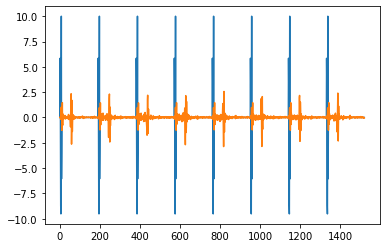

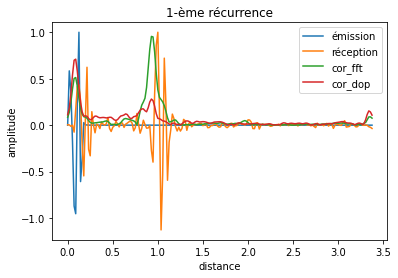

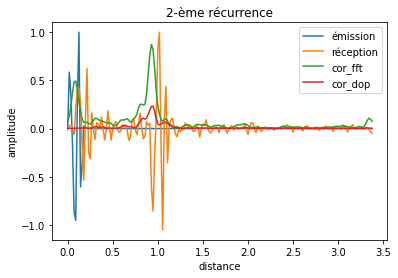

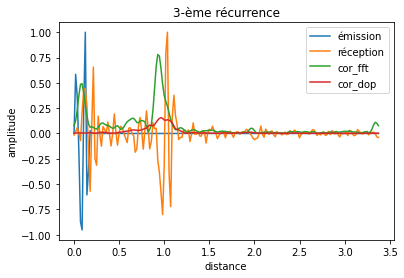

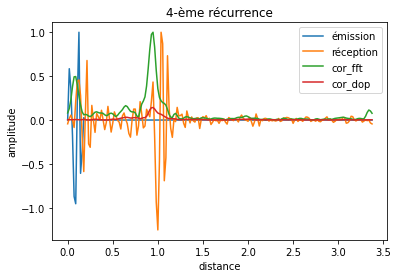

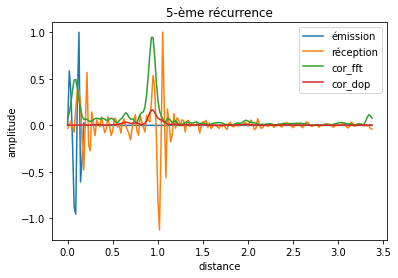

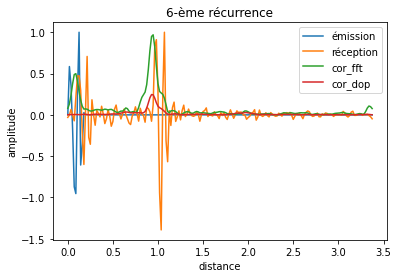

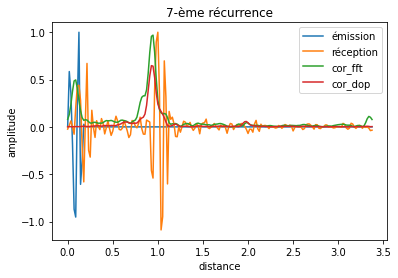

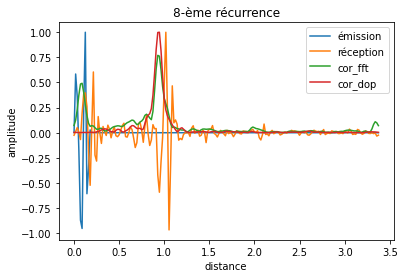

La cible mouvante se situe à 0.9460500000000001m et se déplace à la vitesse 18.640350877192983.


In [5]:
data = scipy.io.loadmat('data/signal3.mat')

e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

plt.figure()
plt.plot(np.arange(0, Nbrec*Tr * Fs), np.real(e))
plt.plot(np.arange(0, Nbrec*Tr * Fs), np.real(r))
plt.show()

N = Tr * Fs                              # Nombre de points par récurrence
e = np.reshape(e,(int(Nbrec),int(N)))  # Conversion du vecteur de Nbrec récurrences en une matrice Nbrec x N
r = np.reshape(r,(int(Nbrec),int(N)))  # Conversion du vecteur de Nbrec récurrences en une matrice Nbrec x N


d = c * np.arange(0,N)/Fs/2                             # axe distance (metres)
fd = np.arange(0,Nbrec)/float(Nbrec)/Tr              # axe fréquence Doppler (Hz)
v = fd*c/2/f0*100                               # conversion des fréquences Doppler en vitesses (cm/s)
cor = np.fft.ifft(np.fft.fft(r, axis = 1)*np.conjugate(np.fft.fft(e, axis = 1)),  axis = 1)           # calcul de la corrélation par FFT
cor_dop = np.fft.fft(cor, axis = 0)        # calcul de la FFT Doppler
i, j = np.unravel_index(np.argmax(np.abs(cor_dop)), cor_dop.shape)
d_cible = d[0,j]
v_cible = v[0,i]         #calcul du maximum de corrélation (estimation de la distance et de la vitesse)

#tracés
for i in range(8):
    plt.figure(),
    plt.plot(d[0],np.real(e[i,:])/np.max(np.real(e[i,:])), label = "émission")
    plt.plot(d[0],np.real(r[i,:])/np.max(np.real(r[i,:])), label = "réception")
    plt.plot(d[0],np.abs(cor[i,:])/np.max(np.abs(cor)), label = "cor_fft")
    plt.plot(d[0],np.abs(cor_dop[i,:])/np.max(np.abs(cor_dop)), label = "cor_dop")
    plt.legend()
    plt.xlabel("distance")
    plt.ylabel("amplitude")
    plt.title(f"{i+1}-ème récurrence")
    plt.show()
print( f'La cible mouvante se situe à {d_cible}m et se déplace à la vitesse {v_cible}.')


In [6]:
(np.arange(0, Nbrec*Tr * Fs)).shape

(1520,)

In [7]:
(np.real(e)).shape

(8, 190)

In [8]:
8*190

1520

Dans notre application, la vitesse de l’objet cible ne nous intéresse pas directement. Par contre, la scène vue par le radar peut comporter d’autres échos possédant une vitesse nulle (on appelle ces échos indésirables le clutter). On peut alors exploiter l’information de Doppler pour éliminer les cibles possédant un Doppler nul. On appelle ce type de filtre, un filtre MTI (Moving Target Indicator).

> ##### Filtrage
>Un filtre $R$ est un système linéaire invariant temporellement. Il est ainsi caractérisé par sa réponse impulsionnelle, $h[n] = R[\delta[n]]$. La sortie temporelle $y[n]$ sera alors le produit de convolution de cette réponse impulsionnelle et de l’entrée $x[n]$:
>
> $$ y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k] = x * h = h * x = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] $$
>
> Par transformée en Z, on sait que ce produit de convolution se transforme en produit simple :
>
> $$ Y(Z) = H(Z) X(Z) $$ 
>
> On peut alors également caractériser le filtre par sa fonction de transfert : $H(Z) = TZ[h[n]]$\\
qui peut être calculée simplement par $H(Z) = \cfrac{Y(z)}{X(Z)}$
> Dans le cas particulier où $x[n] = e^{2 i \pi \tilde{f}n}$ la sortie temporelle s’écrit :
>
>$$ y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = e^{2 i \pi \tilde{f}n} \sum_{k = -\infty}^{+\infty} h[k] e^{-2 i \pi \tilde{f}k} = x[n] H(e^{2 i \pi \tilde f})$$
>Autrement dit, une exponentielle complexe est simplement multipliée par un nombre complexe à la traversée d’un système linéaire (c’est une fonction propre). Ce nombre complexe, n’est autre que la fonction de transfert où l’on a limité $Z$ au cercle unité. $Z(= e^{2 i \pi \tilde f})$.Ainsi, la représentation de $H(e^{2 i \pi \tilde f})$ en fonction des fréquences permet d’analyser le gain (module) et le déphasage (argument) subis par les composantes fréquentielles non amorties. C’est le diagramme de Bode.


Le filtre MTI le plus simple est $H_2(Z) = \cfrac{1 - z^{-1}}{2}$. On utilise classiquement ce type de filtre en
cascade dans les systèmes réels : $H_M(Z) = \left(\cfrac{1 - z^{-1}}{2}\right)^{M-1}$.

#### Question 9

 Tracer le comportement fréquentiel du module et de la phase de $H_2(Z)$. Généraliser à $H_M(Z)$. Calculer la fréquence de coupure de ce filtre. En déduire la vitesse « de coupure » correspondante.

---


On calcule que $|H_M(f)| = |sin(\pi f)|^{M-1}$, on peut donc qualifier ce filtre de filtre passe "multi-bande". Les fréquences de coupure associé à la première bande (centrée en 1/2) de $H_m$ sont donc $f1 = \frac {arcsin( (\frac 1 2)^{-M+1}))} \pi $ et $f2 = \frac {arcsin( (\frac 1 2)^{-M+1})) + \frac \pi 2} \pi $.

Les vitesses de coupures correspondantes sont $ c \frac {f_1} {2f_0}$ et $ c \frac {f_2} {2f_0}$

In [15]:
freq = np.linspace(0,100,100)
z_s = np.exp(2*np.pi*1j*freq)
M = [2, 3, 4, 5, 8, 10]

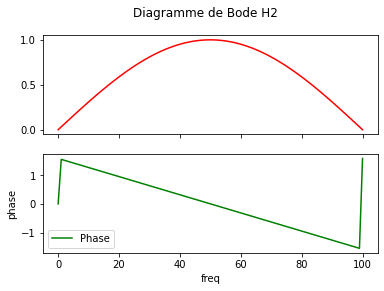

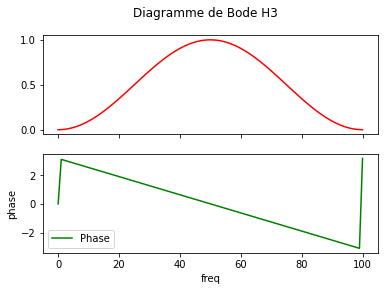

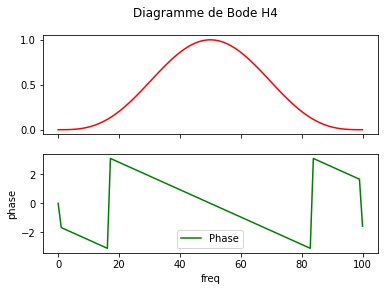

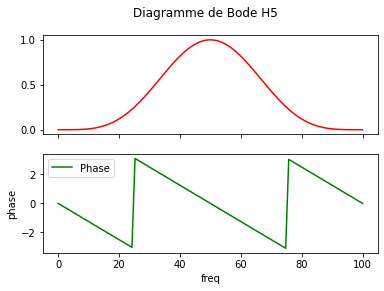

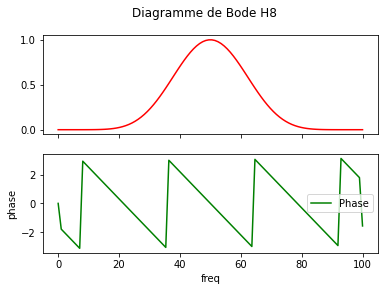

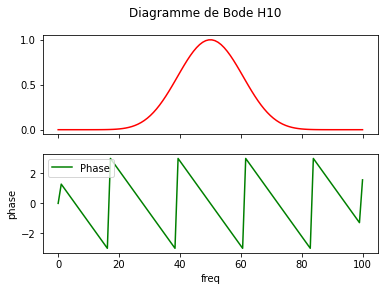

In [16]:
def H_ind(m, z):
    return ((1-1/z)/2)**(m-1)

def H(m):
    return np.vectorize(lambda z: H_ind(m,z))
    
for m in M:
    g = H(m)
    H_s = g(z_s)
    fig, (ax1,ax2) =  plt.subplots(2, sharex = True)
    
    ax2.plot(freq,np.angle(g(z_s)), label = "Phase", color = 'green')
    ax1.plot(freq,np.abs(g(z_s)), label = "Gain", color = 'red')
    plt.legend()
    plt.xlabel("freq")
    plt.ylabel('phase')
    fig.suptitle(f'Diagramme de Bode H{m}')
    plt.show()

#### Question 10

Etudier et tracer le comportement fréquentiel de $G_M(Z) = \cfrac{\sum_{k=0}^{M-1}z^{-k}}{M}$. Montrer que le
changement de variable $Z \to -Z$ permet de passer à filtre passe-haut ($G_M(Z) = G_M(-Z)$). En déduire la fréquence de coupure de ce dernier filtre.

---


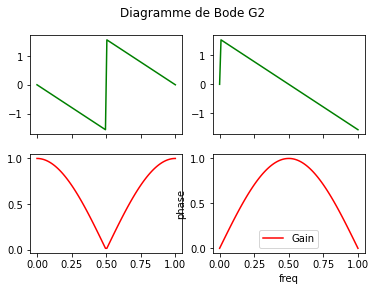

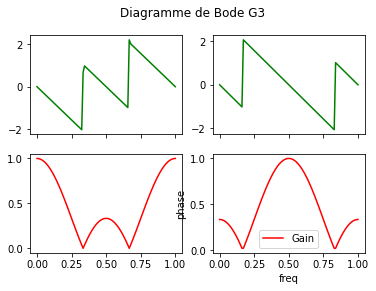

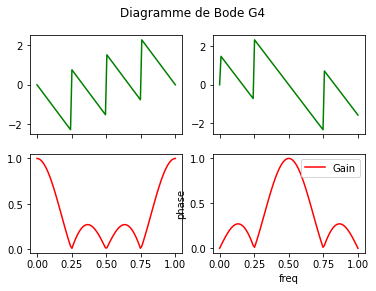

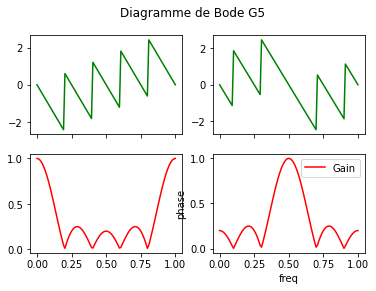

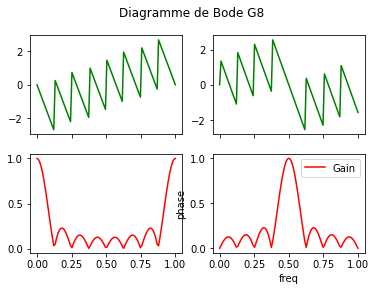

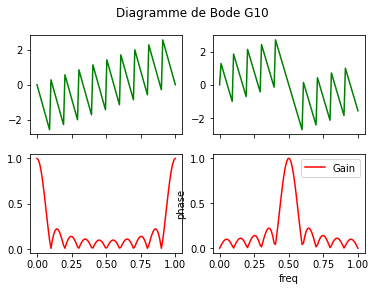

In [11]:
def G_ind(m, z):
    return sum((z**-k for k in range(m)))/m

def G(m):
    return np.vectorize(lambda z: G_ind(m,z))

for m in M:
    g = G(m)
    G_s = g(z_s)
    fig, ax =  plt.subplots(2, 2, sharex = True)
    
    ax[0,0].plot(freq,np.angle(g(z_s)), label = "Phase", color = 'green')
    ax[1,0].plot(freq,np.abs(g(z_s)), label = "Gain", color = 'red')
    ax[0,1].plot(freq,np.angle(g(-z_s)), label = "Phase", color = 'green')
    ax[1,1].plot(freq,np.abs(g(-z_s)), label = "Gain", color = 'red')
    plt.legend()
    plt.xlabel("freq")
    plt.ylabel('phase')
    fig.suptitle(f'Diagramme de Bode G{m}')
    plt.show()

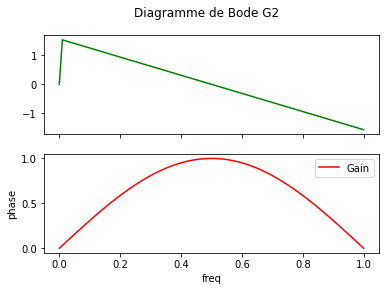

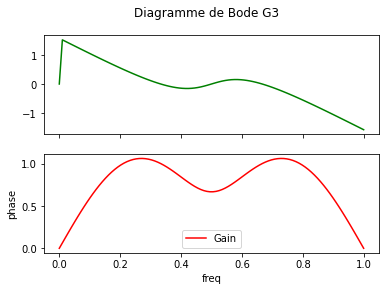

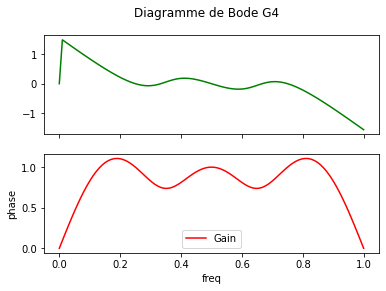

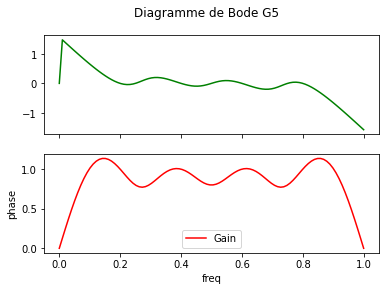

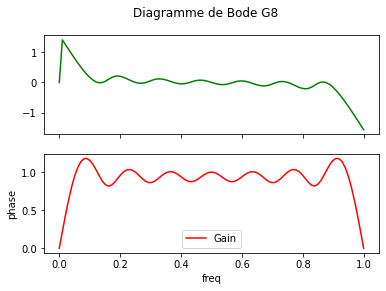

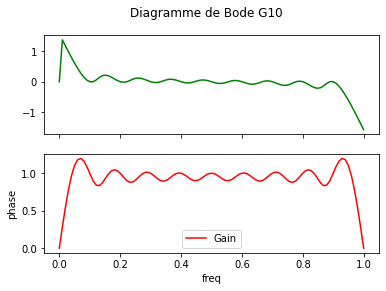

In [12]:
def T_ind(m, z):
    return 1 - sum((z**-k for k in range(m)))/m

def T(m):
    return np.vectorize(lambda z: T_ind(m,z))

for m in M:
    g = T(m)
    G_s = g(z_s)
    fig, (ax1, ax2) =  plt.subplots(2, sharex = True)
    
    ax1.plot(freq,np.angle(g(z_s)), label = "Phase", color = 'green')
    ax2.plot(freq,np.abs(g(z_s)), label = "Gain", color = 'red')

    plt.legend()
    plt.xlabel("freq")
    plt.ylabel('phase')
    fig.suptitle(f'Diagramme de Bode G{m}')
    plt.show()

Pour finir, on s’intéresse à une autre classe de filtres MTI : $T_M(Z) = 1 - \cfrac{\sum_{k = 0}^{M-1}z^{-k}}{M}= 1 - G_M(Z)$. 

`Code 4 - Tracé des gains des filtres MTI
Comparer les filtres MTI précédents à partir des tracés de leurs réponses fréquentielles.
`

`Code 5 - Test des filtres MTI sur signaux réels
Comparer les 4 filtres précédents (M=2 et M=8) en les appliquant aux signaux du fichier « signal4.mat ». Lequel est le mieux adapté à la détection de la cible ?
`

TypeError: imshow() missing 1 required positional argument: 'X'

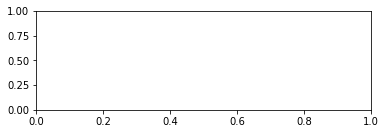

In [13]:
data = scipy.io.loadmat('data/signal4.mat') # chargement du fichier de donnÈes
e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs                              # Nombre de points par récurrence
e = np.reshape(e,(int(Nbrec),int(N)))  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = np.reshape(r,(int(Nbrec),int(N)))  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

      

cor = np.fft.ifft(np.fft.fft(r, axis = 1)*np.conjugate(np.fft.fft(e, axis = 1)),  axis = 1)           # calcul de la corrélation par FFT
cor_dop = np.fft.fft(cor, axis = 0)   # calcul de la FFT Doppler

cor_h2 = None
cor_h8 = None
cor_g8 = None
cor_t8 = None

plt.figure(),
plt.subplot(2, 1, 1), plt.imshow()
plt.xlabel(None)
ylabel(None)
title('carto distance/vitesse')

plt.subplot(2,1,2),plt.plot(None)
plt.legend('sans filtre MTI','H2','H8','G8','T8')